# Build A Portfolio by Calculating Annual Returns and Annual Risks with Python
Reference: https://youtu.be/tjv9yYpvYc8

In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf

In [17]:
# Defining al the portfolio tickers
tickers = ['META','AMZN', 'TSLA', 'GOOG', 'NFLX', 'AAPL', 'CRM', 'MSFT', 'NVDA', 'SPY', 'VGT', 'VOO', 'VTI', 'SHOP', 'GM', 'AMD', 'QQQ', 'V', 'T']

In [23]:
# Iterating through the tickers to get the ajusted close prices
df = pd.DataFrame()
for i in tickers:
    df[i] = yf.download(i, start = '2017-01-03',
                        end = '2022-01-01',
                        progress = False)['Adj Close']

In [32]:
# Showing the dataframe
df.head()

,META,AMZN,TSLA,GOOG,NFLX,AAPL,CRM,MSFT,NVDA,SPY,VGT,VOO,VTI,SHOP,GM,AMD,QQQ,V,T
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,116.736145,37.683498,14.466000,39.306999,127.489998,26.989269,70.540001,57.033264,25.136066,199.819565,114.289589,182.774628,103.168877,4.282,30.193327,11.43,113.663788,75.648460,18.589615
2017-01-04,118.564201,37.859001,15.132667,39.345001,129.410004,26.959059,72.800003,56.778072,25.722525,201.008316,114.980232,183.853210,103.959068,4.414,31.859753,11.43,114.281837,76.266968,18.481586
2017-01-05,120.542099,39.022499,15.116667,39.701000,131.809998,27.096153,72.790001,56.778072,25.069534,200.848633,115.064232,183.711792,103.754890,4.768,31.258478,11.24,114.928406,77.161430,18.429731
2017-01-06,123.279205,39.799500,15.267333,40.307499,131.070007,27.398230,73.800003,57.270210,25.404654,201.567230,116.118820,184.427887,104.083397,4.690,30.914875,11.32,115.936295,78.227158,18.130819
2017-01-09,124.767624,39.846001,15.418667,40.332500,130.949997,27.649181,73.959999,57.087940,26.434637,200.901825,116.324135,183.844391,103.683846,4.718,30.932060,11.49,116.316650,77.789444,17.902641


In [33]:
# Showing the dataframe
df.tail()

,META,AMZN,TSLA,GOOG,NFLX,AAPL,CRM,MSFT,NVDA,SPY,VGT,VOO,VTI,SHOP,GM,AMD,QQQ,V,T
Date,,,,,,,,,,,,,,,,,,,
2021-12-27,345.813080,169.669495,364.646667,148.063995,613.119995,178.065659,258.299988,335.668365,309.023804,462.609802,458.765442,424.745361,235.328812,140.059006,56.398804,154.360001,397.779907,213.895523,16.059635
2021-12-28,345.853058,170.660995,362.823334,146.447998,610.710022,177.038712,255.449997,334.492157,302.802338,462.231781,455.556763,424.425934,234.844528,137.561996,56.084545,153.149994,395.936310,214.308304,16.085562
2021-12-29,342.576538,169.201004,362.063324,146.504501,610.539978,177.127579,254.539993,335.178314,299.596832,462.823120,455.596100,424.938965,234.980087,139.207993,56.202396,148.259995,395.877167,214.426254,15.968901
2021-12-30,343.994995,168.644501,356.779999,146.002502,612.090027,175.962387,255.330002,332.600372,295.452484,461.543610,453.214172,423.738678,234.602371,139.824005,57.086235,145.149994,394.694122,214.131409,16.059635
2021-12-31,335.993500,166.716995,352.260010,144.679504,602.440002,175.340302,254.130005,329.659851,293.704895,460.380402,450.960205,422.577148,233.856537,137.738998,57.577255,143.899994,392.229462,212.991333,15.942979


In [34]:
# Calculating daily simple returns
daily_simple_returns = df.pct_change(1)
daily_simple_returns.head()

,META,AMZN,TSLA,GOOG,NFLX,AAPL,CRM,MSFT,NVDA,SPY,VGT,VOO,VTI,SHOP,GM,AMD,QQQ,V,T
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.015660,0.004657,0.046085,0.000967,0.015060,-0.001119,0.032039,-0.004474,0.023331,0.005949,0.006043,0.005901,0.007659,0.030827,0.055192,0.000000,0.005438,0.008176,-0.005811
2017-01-05,0.016682,0.030732,-0.001057,0.009048,0.018546,0.005085,-0.000137,0.000000,-0.025386,-0.000794,0.000731,-0.000769,-0.001964,0.080199,-0.018873,-0.016623,0.005658,0.011728,-0.002806
2017-01-06,0.022707,0.019912,0.009967,0.015277,-0.005614,0.011148,0.013876,0.008668,0.013368,0.003578,0.009165,0.003898,0.003166,-0.016359,-0.010992,0.007117,0.008770,0.013812,-0.016219
2017-01-09,0.012074,0.001168,0.009912,0.000620,-0.000916,0.009159,0.002168,-0.003183,0.040543,-0.003301,0.001768,-0.003164,-0.003839,0.005970,0.000556,0.015018,0.003281,-0.005595,-0.012585


In [31]:
# Calculating annual returns
annual_returns = daily_simple_returns.mean() * 252
annual_returns

META    0.267399
AMZN    0.341209
TSLA    0.821496
GOOG    0.297598
NFLX    0.383656
AAPL    0.421515
CRM     0.312887
MSFT    0.389476
NVDA    0.604130
SPY     0.185145
VGT     0.304648
VOO     0.186489
VTI     0.182613
SHOP    0.830478
GM      0.202077
AMD     0.665488
QQQ     0.273318
V       0.242802
T      -0.002624
dtype: float64

In [36]:
# Calculating annual risks
annual_risks = daily_simple_returns.std() * math.sqrt(252)
annual_risks

META    0.331638
AMZN    0.294334
TSLA    0.603585
GOOG    0.269893
NFLX    0.381580
AAPL    0.304499
CRM     0.336381
MSFT    0.274915
NVDA    0.470348
SPY     0.188611
VGT     0.242510
VOO     0.192012
VTI     0.192420
SHOP    0.517935
GM      0.381651
AMD     0.562022
QQQ     0.223434
V       0.265984
T       0.236812
dtype: float64

In [37]:
# Sort the data in descending order
sorted_annualized_returns = annual_returns.sort_values(ascending=False)
sorted_annualized_returns

SHOP    0.830478
TSLA    0.821496
AMD     0.665488
NVDA    0.604130
AAPL    0.421515
MSFT    0.389476
NFLX    0.383656
AMZN    0.341209
CRM     0.312887
VGT     0.304648
GOOG    0.297598
QQQ     0.273318
META    0.267399
V       0.242802
GM      0.202077
VOO     0.186489
SPY     0.185145
VTI     0.182613
T      -0.002624
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

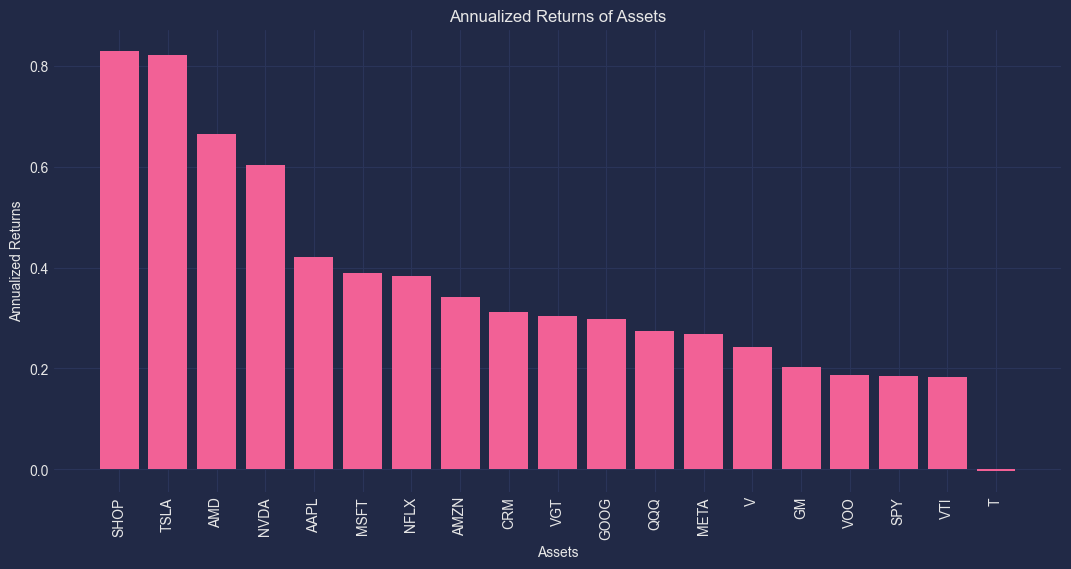

In [56]:
# Plot the sort annualized returns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.figure(figsize=(13,6))
plt.bar(sorted_annualized_returns.index, sorted_annualized_returns, color = '#f26196')
plt.ylabel('Annualized Returns')
plt.xlabel('Assets')
plt.xticks(rotation = 90)
plt.title('Annualized Returns of Assets')
plt.show

In [47]:
# Create a dataframe to store the annual returns, annual risks and company ticker + create a ratio column
df2 = pd.DataFrame()
df2['Expected Annual Return'] = annual_returns
df2['Expected Annual Risk'] = annual_risks
df2['Company Ticker'] = df2.index
df2['Ratio'] = df2['Expected Annual Return'] / df2['Expected Annual Risk']
df2.sort_values(by='Ratio', axis = 0, ascending = False, inplace = False)

,Expected Annual Return,Expected Annual Risk,Company Ticker,Ratio
SHOP,0.830478,0.517935,SHOP,1.603440
MSFT,0.389476,0.274915,MSFT,1.416714
AAPL,0.421515,0.304499,AAPL,1.384291
TSLA,0.821496,0.603585,TSLA,1.361028
NVDA,0.604130,0.470348,NVDA,1.284432
VGT,0.304648,0.242510,VGT,1.256231
QQQ,0.273318,0.223434,QQQ,1.223260
AMD,0.665488,0.562022,AMD,1.184096
AMZN,0.341209,0.294334,AMZN,1.159260
GOOG,0.297598,0.269893,GOOG,1.102652


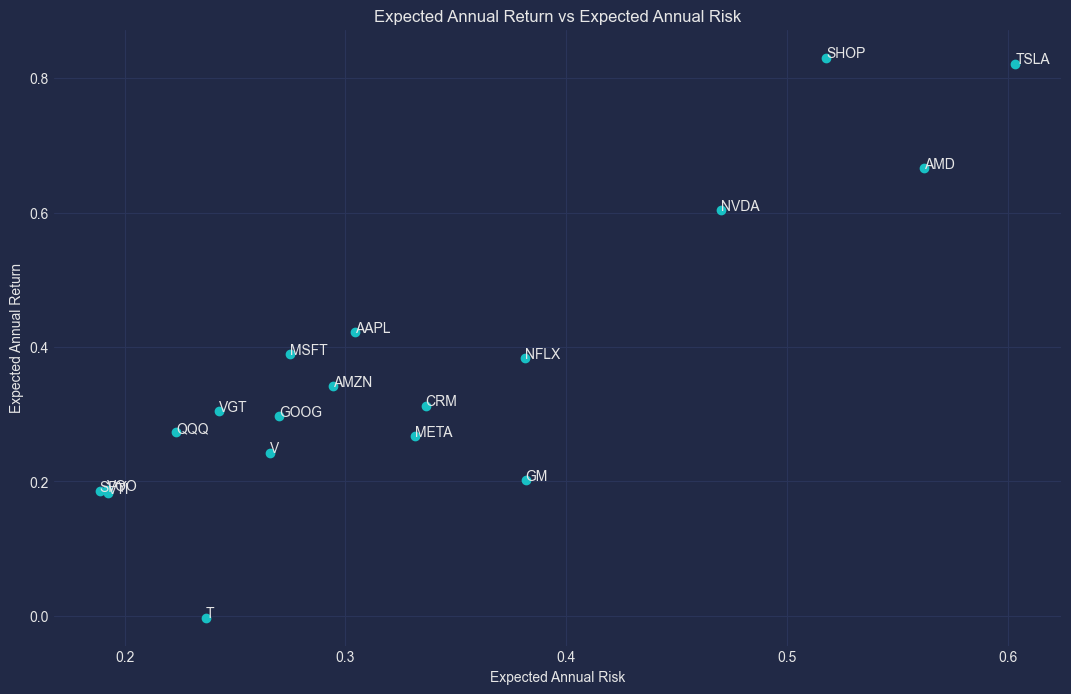

In [54]:
# Visually show the expected annual returns vs expected annual risks
fig, ax = plt.subplots(figsize=(13,8))
plt.title('Expected Annual Return vs Expected Annual Risk')
ax.scatter(df2['Expected Annual Risk'], df2['Expected Annual Return'])
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Return')

# Annotate the points on the plot
for idx, row in df2.iterrows():
    ax.annotate(row['Company Ticker'], (row['Expected Annual Risk'], row['Expected Annual Return']))

# Show the scatter plot
plt.show()

In [62]:
# Showing an example of an asset that has a higher return and a lower risk than another asset (e.g. AMZN)
row = 'AMZN'
df2.loc[(df2['Expected Annual Return'] > df2.loc[row, 'Expected Annual Return']) & 
        (df2['Expected Annual Risk'] < df2.loc[row, 'Expected Annual Risk'])]

,Expected Annual Return,Expected Annual Risk,Company Ticker,Ratio
MSFT,0.389476,0.274915,MSFT,1.416714


In [69]:
# Gathering a list of tickers that have a lower return and a more risk than other in this dataset
remove_asset_list = []
for ticker in df2['Company Ticker'].values:
    no_better_assets_exists = df2.loc[(df2['Expected Annual Return'] > df2.loc[ticker, 'Expected Annual Return']) & (df2['Expected Annual Risk'] < df2.loc[ticker, 'Expected Annual Risk'])].empty
    if no_better_assets_exists == False:
        remove_asset_list.append(ticker)

# Show
remove_asset_list

['META', 'AMZN', 'TSLA', 'GOOG', 'NFLX', 'CRM', 'VTI', 'GM', 'AMD', 'V', 'T']

In [70]:
# Show the assets that have the highest returns and lower risks
df3 = df2.drop(remove_asset_list)
df3

,Expected Annual Return,Expected Annual Risk,Company Ticker,Ratio
AAPL,0.421515,0.304499,AAPL,1.384291
MSFT,0.389476,0.274915,MSFT,1.416714
NVDA,0.604130,0.470348,NVDA,1.284432
SPY,0.185145,0.188611,SPY,0.981625
VGT,0.304648,0.242510,VGT,1.256231
VOO,0.186489,0.192012,VOO,0.971233
SHOP,0.830478,0.517935,SHOP,1.603440
QQQ,0.273318,0.223434,QQQ,1.223260


In [73]:
# Redoing the calculations for the new portfolio
assets = df3.index
num_assets = len(assets)
num_assets

8

In [74]:
# Calculate the new simple daily returns
daily_simple_returns = df[assets].pct_change(1)

# Calculate the new annual returns
annual_returns = daily_simple_returns.mean() * 252

# Create weights
n = 1 / float(num_assets)
weights = [n] * num_assets
weights = np.array(weights)
weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [76]:
# Calculate the covariance matrix
cov_matrix_annual = daily_simple_returns.cov() * 252
cov_matrix_annual

,AAPL,MSFT,NVDA,SPY,VGT,VOO,SHOP,QQQ
AAPL,0.092719,0.061712,0.085928,0.043787,0.063272,0.044448,0.073423,0.057539
MSFT,0.061712,0.075578,0.084431,0.043133,0.060365,0.043956,0.078482,0.055571
NVDA,0.085928,0.084431,0.221227,0.057479,0.086404,0.058332,0.125480,0.079100
SPY,0.043787,0.043133,0.057479,0.035574,0.042455,0.036176,0.047114,0.038717
VGT,0.063272,0.060365,0.086404,0.042455,0.058811,0.043147,0.076793,0.053006
VOO,0.044448,0.043956,0.058332,0.036176,0.043147,0.036869,0.047671,0.039341
SHOP,0.073423,0.078482,0.125480,0.047114,0.076793,0.047671,0.268257,0.070304
QQQ,0.057539,0.055571,0.079100,0.038717,0.053006,0.039341,0.070304,0.049923


In [77]:
# Calculate the variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

0.06615769222609157

In [78]:
# Calculate the annual volatility or risk
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.25721137654872805

In [80]:
# Calculate and show the expected returns as a percentage
portfolio_returns_expected = np.sum(weights * annual_returns)
print(str(round(portfolio_returns_expected * 100, 2))+'%')

39.94%
